# **Binary Classification**

In [ ]:
import pandas as pd
!pip install --upgrade scikit-learn
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Mounted at /content/drive


In [ ]:
# Access the file in Google Drive
fp = '/content/drive/MyDrive/Dataset/InSDN_DatasetCSV/Normal_data.csv'
fp1 = '/content/drive/MyDrive/Dataset/InSDN_DatasetCSV/OVS.csv'
Normal_data_df=pd.read_csv(fp)
OVS_df=pd.read_csv(fp1)


In [ ]:
df = pd.concat([Normal_data_df,OVS_df],
                axis=0, sort=False, ignore_index=True)

In [ ]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207141,172.17.0.2-200.175.2.130-80-55440-6,200.175.2.130,55440,172.17.0.2,80,6,25/12/2019 05:19:55 PM,296,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
207142,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,3431,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
207143,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,4121,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
207144,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,25/12/2019 05:20:05 PM,5887,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack


In [ ]:
df["Label"].value_counts()

Normal        68424
DoS           52471
DDoS          48413
Probe         36372
BFA            1110
Web-Attack      192
BOTNET          164
Name: Label, dtype: int64

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Label' is the column containing the attack labels

# Step 1: Identify the attack labels
attack_labels = ['BOTNET', 'Web-Attack', 'BFA', 'Probe', 'DDoS', 'DoS']

# Step 2: Update the labels
df["Label"] = df["Label"].replace(attack_labels, 1)

# Step 3: Set non-attacks to 0
df["Label"] = df["Label"].apply(lambda x: 0 if x != 1 else x)
df["Label"] = df["Label"].astype(int)
df["Label"].value_counts()

0    116837
1     90309
Name: Label, dtype: int64

In [ ]:
#Missing values
df.isnull().sum() #No missing Values available

Flow ID      0
Src IP       0
Src Port     0
Dst IP       0
Dst Port     0
            ..
Idle Mean    0
Idle Std     0
Idle Max     0
Idle Min     0
Label        0
Length: 84, dtype: int64

In [ ]:
#Duplicate values checking
df.duplicated()
#Removing duplicate values
df.drop_duplicates(inplace = True)
df.shape

(207145, 84)

In [ ]:
df["Label"].value_counts()

0    116836
1     90309
Name: Label, dtype: int64

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from sklearn.decomposition import PCA

# Replace infinity and large values with NaNs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
df.dropna(inplace=True)

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].astype(str)
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

# **Fetaure Selection using Correlation Analysis, Mutual Information, and Principal Component Analysis**

In [ ]:
# Split dataset into features and labels
X = df.drop('Label', axis=1)
y = df['Label']
# Convert the target variable y to a discrete variable
y = pd.cut(y, bins=10, duplicates='drop', labels=False)
# Split dataset into features and labels
X = df.drop('Label', axis=1)
y = df['Label']
# Convert the target variable y to a discrete variable
y = pd.cut(y, bins=10, duplicates='drop', labels=False)

# Correlation analysis
corr = X.corr()
corr_abs = corr.abs()
relevant_features_corr = corr_abs[corr_abs > 0.5].index.tolist()

# Mutual information
mutual_info = SelectKBest(mutual_info_classif, k=20).fit(X, y)
relevant_features_mutual = X.columns[mutual_info.get_support()].tolist()

# PCA
pca = PCA(n_components=20)
pca.fit(X)
relevant_features_pca = X.columns[pca.components_.argmax(axis=1)].tolist()

# Combine relevant features from all three methods
relevant_features = list(set().union(relevant_features_corr, relevant_features_mutual, relevant_features_pca))

In [ ]:
df["Label"].value_counts()

-0.879179    116836
 1.137425     90309
Name: Label, dtype: int64

# **Splitting the Dataset into Train with Relevant Features and Testing**

In [ ]:
# Print relevant features
#print('Relevant Features:')
for i, feature in enumerate(relevant_features):
    print(f'{i+1}. {feature}')

1. TotLen Fwd Pkts
2. Fwd Pkt Len Max
3. Src IP
4. Pkt Len Var
5. Flow IAT Std
6. Fwd IAT Max
7. Subflow Bwd Pkts
8. Fwd IAT Mean
9. ACK Flag Cnt
10. Timestamp
11. Fwd IAT Min
12. Bwd Blk Rate Avg
13. Fwd Header Len
14. Fwd Seg Size Avg
15. Protocol
16. Down/Up Ratio
17. Idle Mean
18. Bwd Pkts/s
19. Bwd Pkts/b Avg
20. Flow IAT Max
21. Fwd URG Flags
22. Active Max
23. Tot Bwd Pkts
24. Pkt Len Min
25. Fwd Pkts/b Avg
26. Fwd Act Data Pkts
27. Bwd IAT Mean
28. Bwd Byts/b Avg
29. Bwd IAT Tot
30. Bwd IAT Min
31. Pkt Len Std
32. Pkt Len Max
33. Pkt Size Avg
34. SYN Flag Cnt
35. Bwd Pkt Len Max
36. Bwd Pkt Len Std
37. Bwd PSH Flags
38. TotLen Bwd Pkts
39. Fwd Pkts/s
40. Fwd IAT Std
41. Bwd Seg Size Avg
42. Flow Pkts/s
43. Idle Min
44. Pkt Len Mean
45. CWE Flag Count
46. Bwd URG Flags
47. Active Mean
48. Fwd Pkt Len Mean
49. Dst Port
50. Flow IAT Mean
51. Bwd Pkt Len Min
52. Src Port
53. Flow Byts/s
54. Init Bwd Win Byts
55. Subflow Bwd Byts
56. Init Fwd Win Byts
57. Active Min
58. Fwd Pkt Len 

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# **Number of samples for training and test**

In [ ]:
print("Number of samples in x_test:", X_test.shape[0])
print("Number of samples in y_test:", y_test.shape[0])

Number of samples in x_test: 41429
Number of samples in y_test: 41429


# **Model Developing using Extra Tree Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score, roc_auc_score
import time

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Initialize ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=10, random_state=42)

start_time = time.time()  # Training time starting

# Train model
et.fit(X_train, y_train)

end_time = time.time()  # Training time ending
training_time = end_time - start_time

start_pred_time = time.time()  # Testing time starting

# Test model
yet_pred = et.predict(X_test)

end_pred_time = time.time()  # Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, yet_pred)
precision = precision_score(y_test, yet_pred, average='weighted')
recall = recall_score(y_test, yet_pred, average='weighted')
f1 = f1_score(y_test, yet_pred, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, yet_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Calculate true positive (TP), false positive (FP), true negative (TN), false negative (FN)
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - TP - FP - FN

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = np.round(np.mean(TP / (TP + FN)), 5)
FPR = np.round(np.mean(FP / (FP + TN)), 5)

# Calculate balanced accuracy (BACC)
BACC = np.round(0.5 * (np.mean(TP / (TP + FN)) + np.mean(TN / (TN + FP))), 5)

# Calculate Matthews correlation coefficient (MCC)
#num = (TP * TN) - (FP * FN)
#den = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
#MCC = np.round(np.mean(num / den), 5)

# Print metrics
print(f'Average TPR: {TPR:.5f}')
print(f'Average FPR: {FPR:.5f}')
print(f'Balanced Accuracy (BACC): {BACC:.5f}')
#print(f'Matthews Correlation Coefficient (MCC): {MCC:.5f}')

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = et.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')



# Make predictions on test set
y_pred = et.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')


kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")
# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, yet_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate AUC score
y_prob = et.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC Score: {auc_score:.5f}')


Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000
Training time: 0.95803 seconds
Testing Time: 0.06373 seconds
Confusion Matrix:
[[23267     0]
 [    0 18162]]
True Positives (TP): [23267 18162]
False Positives (FP): [0 0]
False Negatives (FN): [0 0]
True Negatives (TN): [18162 23267]
Average TPR: 1.00000
Average FPR: 0.00000
Balanced Accuracy (BACC): 1.00000
Error rate: 0.00000
Training accuracy: 1.00000
Test Accuracy: 1.00000
Cohen's Kappa: 1.00000
Observed Accuracy (Po): 1.00000
Expected Accuracy (Pe): 0.50759
Cohen's Kappa: 1.00000
AUC Score: 1.00000


In [ ]:
print("Number of samples in x_test:", X_test.shape[0])
print("Number of samples in y_test:", y_test.shape[0])

Number of samples in x_test: 41429
Number of samples in y_test: 41429


# **values for various classes in the confusion matrix**

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Extract TP, FP, FN, TN values
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Print TP, FP, FN, TN values
print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'FN: {FN}')
print(f'TN: {TN}')

Confusion Matrix:
[[23267     0]
 [    0 18162]]
TP: 18162
FP: 0
FN: 0
TN: 23267


# **Visualization of Confusion Matrix**

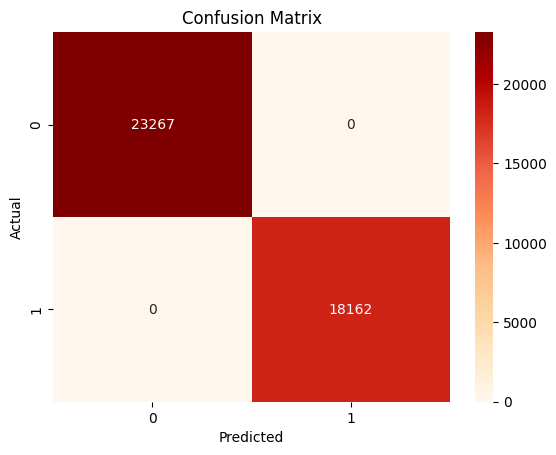

In [ ]:
# Visualization of confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap='OrRd', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Evaluation Metrics for Each Class**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy for each class
accuracy_per_class = []
for i in range(6):
    accuracy_per_class.append(accuracy_score(y_test == i, yet_pred == i))

# Calculate precision for each class
precision_per_class = precision_score(y_test, yet_pred, average=None)

# Calculate recall for each class
recall_per_class = recall_score(y_test, yet_pred, average=None)

# Calculate F1 score for each class
f1_score_per_class = f1_score(y_test, yet_pred, average=None)

# Print results
print("Class\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for i in range(2):
    print(f"{i}\t{accuracy_per_class[i]:.4f}\t\t{precision_per_class[i]:.4f}\t\t{recall_per_class[i]:.4f}\t\t{f1_score_per_class[i]:.4f}")

# Calculate other metrics

# Calculate Cohen's Kappa score
cohen_kappa = cohen_kappa_score(y_test, yet_pred)
print(f"Cohen's Kappa Score: {cohen_kappa:.4f}")

# Calculate ROC AUC score (For binary classification, needs modification for multi-class)
# Assuming you are interested in one class against the rest (binary)
roc_auc = roc_auc_score(y_test, et.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

# Print training and testing time
print(f"Training Time: {training_time:.4f} seconds")
end_pred_time = time.time()  # Testing time ending
testing_time = end_pred_time - start_pred_time
print(f"Testing Time: {testing_time:.4f} seconds")


Class	Accuracy	Precision	Recall		F1 Score
0	1.0000		1.0000		1.0000		1.0000
1	1.0000		1.0000		1.0000		1.0000
Cohen's Kappa Score: 1.0000
ROC AUC Score: 1.0000
Training Time: 0.9580 seconds
Testing Time: 1.3162 seconds


# **Pie Chart**

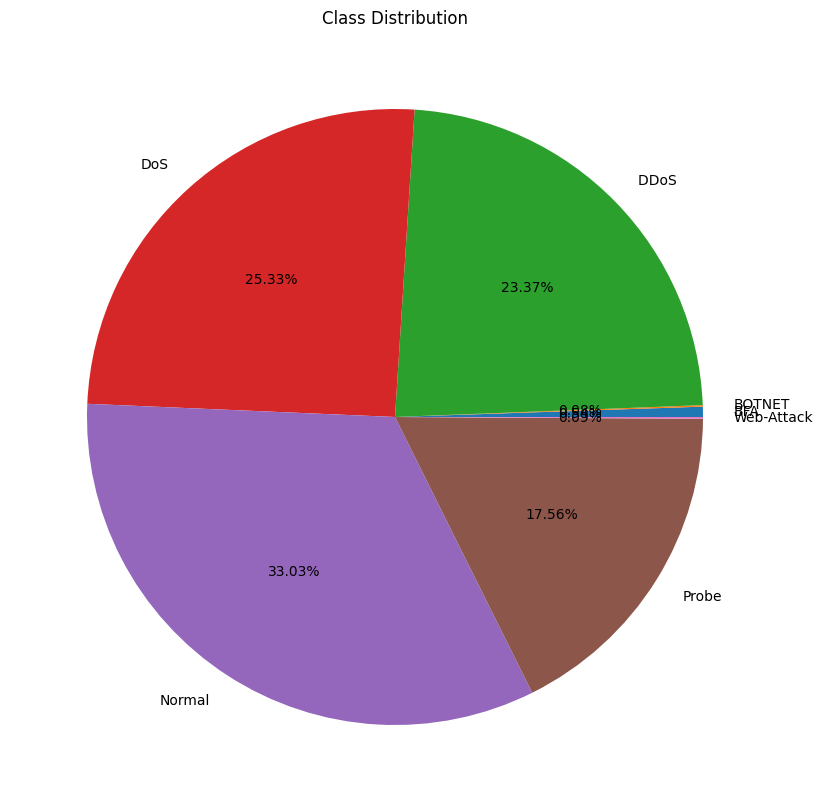

In [ ]:
import matplotlib.pyplot as plt

plt.title("Class Distribution")
class_counts = df.groupby("Label").size()
class_percentages = class_counts / class_counts.sum() * 100
class_percentages.plot(kind='pie', autopct='%.2f%%', figsize=(20, 10))
plt.show()

# **Confidence Curve Visualization**

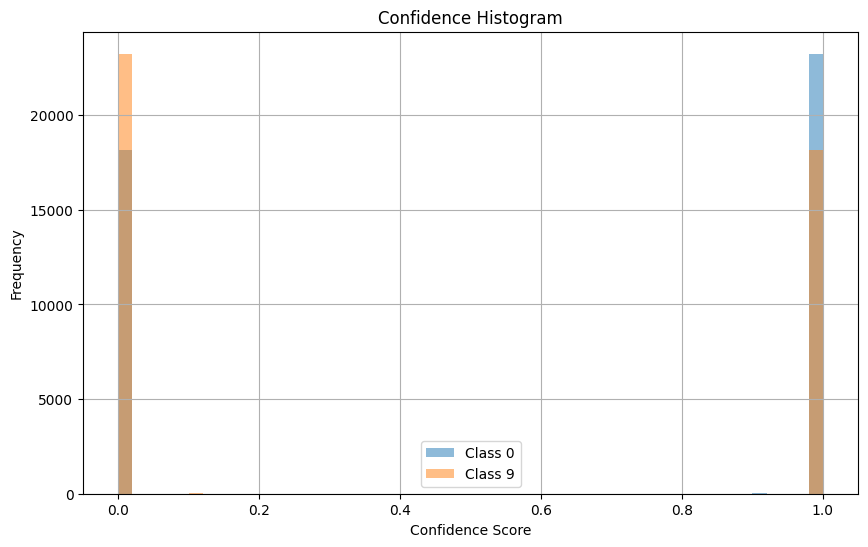

In [ ]:
import matplotlib.pyplot as plt

# Train the ExtraTreesClassifier model as before
et.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_pred_proba = et.predict_proba(X_test)

# Plot the Confidence Histogram
plt.figure(figsize=(10, 6))
for class_idx in range(len(et.classes_)):
    plt.hist(y_pred_proba[:, class_idx], bins=50, alpha=0.5, label=f'Class {et.classes_[class_idx]}')

plt.title('Confidence Histogram')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


# **Learning Curves**

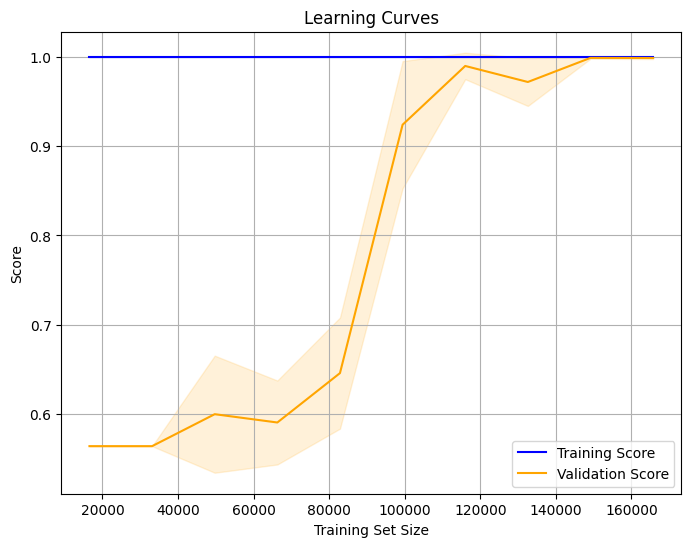

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define the ExtraTreesClassifier and relevant_features as before

# Vary the training set size
train_sizes, train_scores, val_scores = learning_curve(
    et, X[relevant_features], y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='orange')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


# **ROC Curve of TPR vs FPR**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


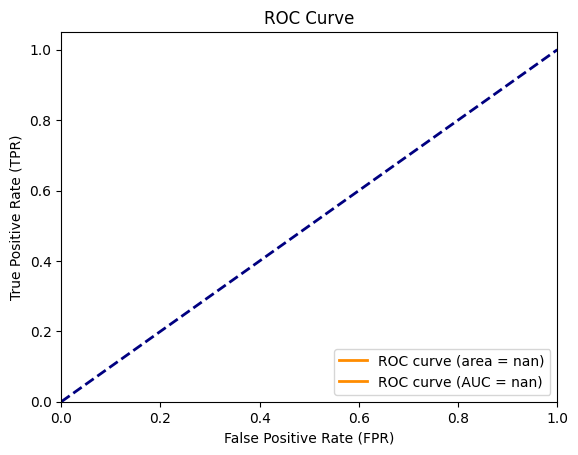

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure that y_test contains only binary labels (0 or 1)
y_test_binary = (y_test == 1).astype(int)
y_probabilities = et.predict_proba(X_test)
y_prob_positive_class = y_probabilities[:, 1]
# Compute the predicted probabilities for the positive class (class 1)
y_pred_proba_positive_class = y_pred_proba[:, 1]

# Compute the ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba_positive_class)
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob_positive_class, pos_label=1)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)

# Plot micro-average ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
# Add labels and legends
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# **Accuracy vs Number of Trees in Extra Tree Classifier**

1.0
0.9999034492746627
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


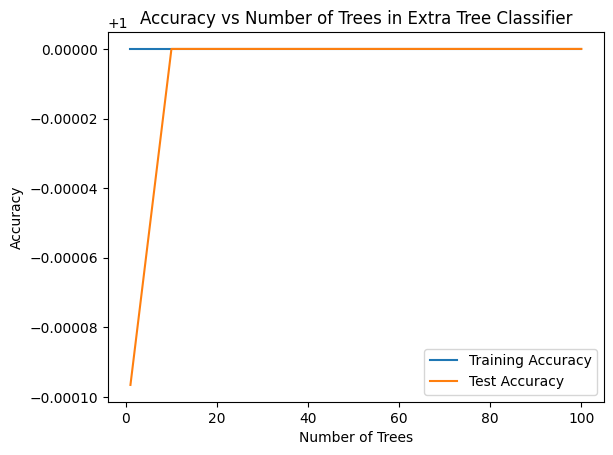

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Create a list of the number of trees to test
n_trees = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create empty lists to store accuracy values for each number of trees
train_accuracy = []
test_accuracy = []

# Loop through each number of trees
for n in n_trees:
    # Create a random forest classifier with n trees
    et = ExtraTreesClassifier(n_estimators=n, random_state=42)
    # Fit the model on the training data
    et.fit(X_train, y_train)
    # Calculate accuracy on training data
    train_acc = et.score(X_train, y_train)
    print (train_acc)
    # Append the training accuracy to the list
    train_accuracy.append(train_acc)
    # Calculate accuracy on test data
    y_pred = et.predict(X_test)

    # Calculate accuracy on test set
    test_acc = accuracy_score(y_test, y_pred)
    print(test_acc)

    # Append the test accuracy to the list
    test_accuracy.append(test_acc)

# Create a line plot of the accuracy vs number of trees
plt.plot(n_trees, train_accuracy, label='Training Accuracy')
plt.plot(n_trees, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees in Extra Tree Classifier')
plt.legend()
plt.show()


# **Log Loss Plot with Respect to Predicted Probabilities**

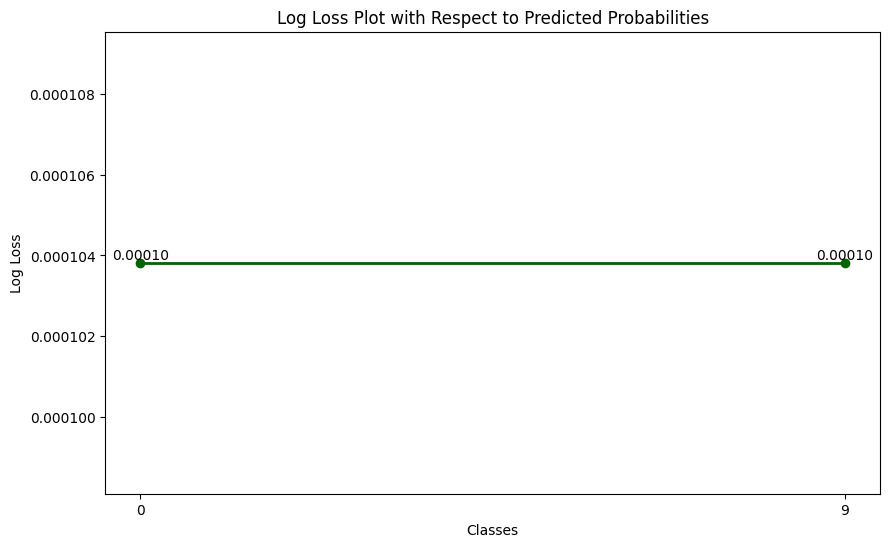

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np

# Get unique labels from true labels
unique_labels = np.unique(y)

# Calculate log loss for each class
log_losses = []
for class_label in unique_labels:
    class_index = np.where(et.classes_ == class_label)[0][0]
    y_true_class = np.where(y_test == class_label, 1, 0)
    y_pred_class = y_pred_proba[:, class_index]
    class_log_loss = log_loss(y_true_class, y_pred_class)
    log_losses.append(class_log_loss)

# Set plot parameters
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(unique_labels, log_losses, marker='o', color='darkgreen', linewidth=2)  # Change color and linewidth
plt.xlabel('Classes')
plt.ylabel('Log Loss')
plt.title('Log Loss Plot with Respect to Predicted Probabilities')
plt.xticks(unique_labels)

# Annotate the log loss values
for i, log_loss_val in enumerate(log_losses):
    plt.text(unique_labels[i], log_loss_val, f'{log_loss_val:.5f}', ha='center', va='bottom')

plt.show()


# **Visualization of Real and Predicted data**

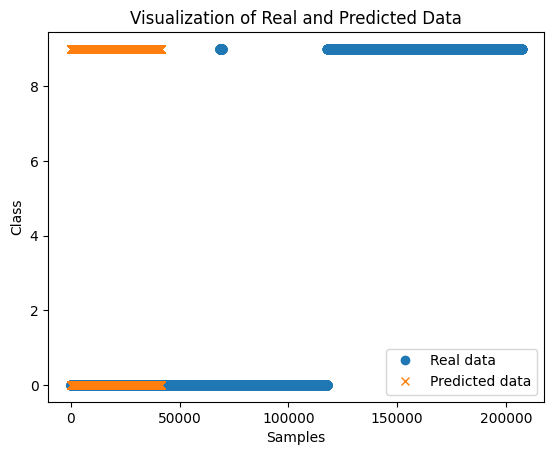

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test, 'o', label='Real data')
plt.plot(y_pred, 'x', label='Predicted data')
plt.title('Visualization of Real and Predicted Data')
plt.xlabel('Samples')
plt.ylabel('Class')
plt.legend()
plt.show()



# **Precision Recall Curves**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class f

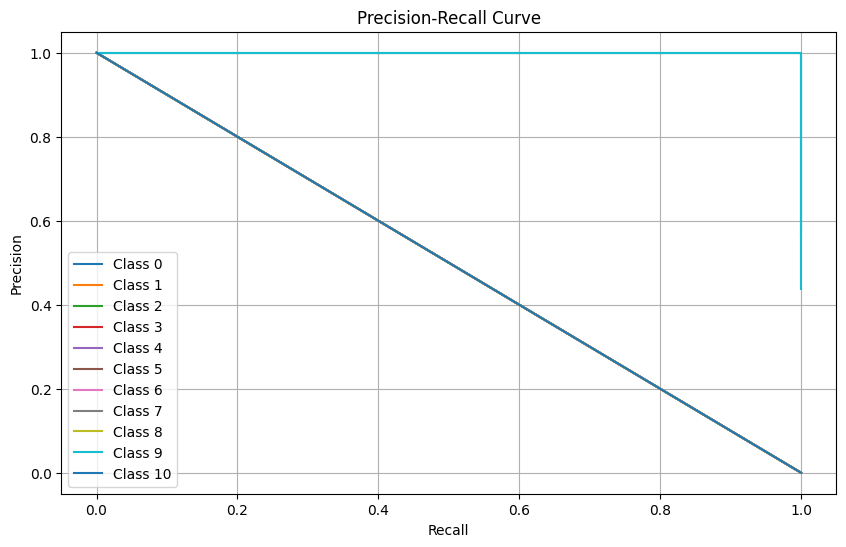

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Convert y_test and yet_pred into binary label matrices
y_test_bin = label_binarize(y_test, classes=range(11))
yet_pred_bin = label_binarize(yet_pred, classes=range(11))

# Compute precision and recall for each class
precision = dict()
recall = dict()
for i in range(11):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], yet_pred_bin[:, i])

# Plot the precision-recall curve for each class
plt.figure(figsize=(10, 6))
for i in range(11):
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# **Roc Curves**

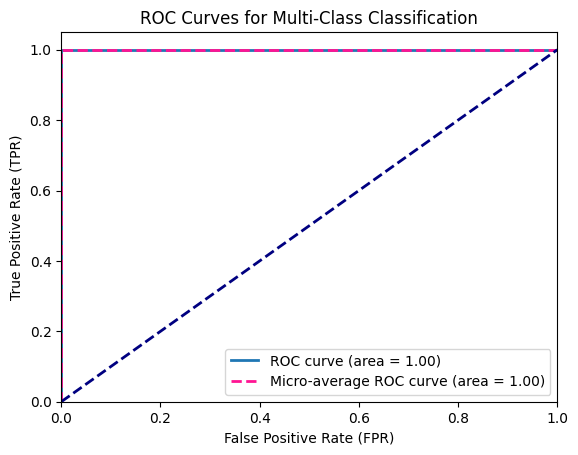

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.unique(y))
yet_pred_bin = label_binarize(yet_pred, classes=np.unique(y))

# Compute the ROC curve for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], yet_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), yet_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curve for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', lw=lw, linestyle='--', label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)

# Add labels and legends
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


# **Visualization of Predicted Data**

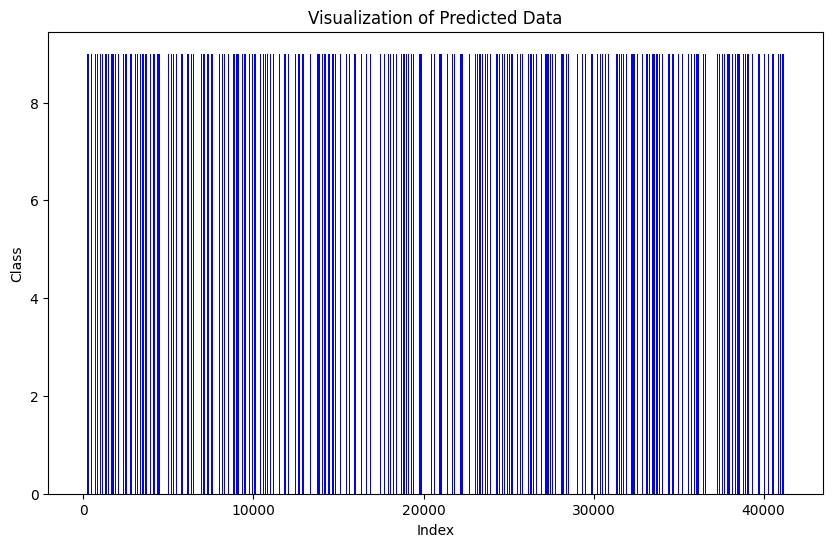

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of indices
indices = np.arange(len(yet_pred))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the predicted values
plt.bar(indices, yet_pred, color='blue')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Class')
plt.title('Visualization of Predicted Data')

# Show the plot
plt.show()


# **Visualization of Comparison of Actual and Predicted Data**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


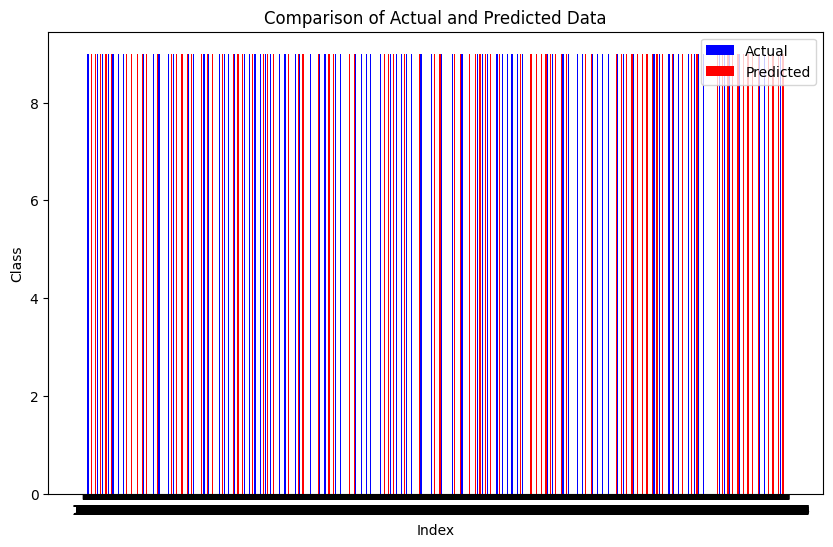

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of indices
indices = np.arange(len(y_test))

# Set the width of the bars
bar_width = 0.35

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the actual values
plt.bar(indices - bar_width/2, y_test, color='blue', width=bar_width, label='Actual')

# Plot the predicted values
plt.bar(indices + bar_width/2, yet_pred, color='red', width=bar_width, label='Predicted')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Data')
plt.xticks(indices)
plt.legend()

# Show the plot
plt.show()


#**Multi-classification**

In [ ]:
import pandas as pd
!pip install --upgrade scikit-learn
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Access the file in Google Drive
fp = '/content/drive/MyDrive/Dataset/InSDN_DatasetCSV/Normal_data.csv'
fp1 = '/content/drive/MyDrive/Dataset/InSDN_DatasetCSV/OVS.csv'
Normal_data_df=pd.read_csv(fp)
OVS_df=pd.read_csv(fp1)

In [ ]:
df = pd.concat([Normal_data_df,OVS_df],
                axis=0, sort=False, ignore_index=True)

In [ ]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207141,172.17.0.2-200.175.2.130-80-55440-6,200.175.2.130,55440,172.17.0.2,80,6,25/12/2019 05:19:55 PM,296,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
207142,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,3431,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
207143,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,4121,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
207144,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,25/12/2019 05:20:05 PM,5887,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack


In [ ]:
#Missing values
df.isnull().sum() #No missing Values available
#Duplicate values checking
df.duplicated()
#Removing duplicate values
df.drop_duplicates(inplace = True)
df.shape

(207145, 84)

In [ ]:
df["Label"].value_counts()

Normal        68423
DoS           52471
DDoS          48413
Probe         36372
BFA            1110
Web-Attack      192
BOTNET          164
Name: Label, dtype: int64

# **Relevant Feature Selection**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from sklearn.decomposition import PCA

# Replace infinity and large values with NaNs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
df.dropna(inplace=True)

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].astype(str)
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [ ]:
# Split dataset into features and labels
X = df.drop('Label', axis=1)
y = df['Label']
# Convert the target variable y to a discrete variable
y = pd.cut(y, bins=10, duplicates='drop', labels=False)
# Split dataset into features and labels
X = df.drop('Label', axis=1)
y = df['Label']
# Convert the target variable y to a discrete variable
y = pd.cut(y, bins=10, duplicates='drop', labels=False)

# Correlation analysis
corr = X.corr()
corr_abs = corr.abs()
relevant_features_corr = corr_abs[corr_abs > 0.5].index.tolist()

# Mutual information
mutual_info = SelectKBest(mutual_info_classif, k=20).fit(X, y)
relevant_features_mutual = X.columns[mutual_info.get_support()].tolist()

# PCA
pca = PCA(n_components=20)
pca.fit(X)
relevant_features_pca = X.columns[pca.components_.argmax(axis=1)].tolist()

# Combine relevant features from all three methods
relevant_features = list(set().union(relevant_features_corr, relevant_features_mutual, relevant_features_pca))

In [ ]:
# Print relevant features
#print('Relevant Features:')
for i, feature in enumerate(relevant_features):
    print(f'{i+1}. {feature}')

1. TotLen Fwd Pkts
2. Fwd Pkt Len Max
3. Src IP
4. Pkt Len Var
5. Flow IAT Std
6. Fwd IAT Max
7. Subflow Bwd Pkts
8. Fwd IAT Mean
9. ACK Flag Cnt
10. Timestamp
11. Fwd IAT Min
12. Bwd Blk Rate Avg
13. Fwd Header Len
14. Fwd Seg Size Avg
15. Protocol
16. Down/Up Ratio
17. Idle Mean
18. Bwd Pkts/s
19. Bwd Pkts/b Avg
20. Flow IAT Max
21. Fwd URG Flags
22. Active Max
23. Tot Bwd Pkts
24. Pkt Len Min
25. Fwd Pkts/b Avg
26. Fwd Act Data Pkts
27. Bwd IAT Mean
28. Bwd Byts/b Avg
29. Bwd IAT Tot
30. Bwd IAT Min
31. Pkt Len Std
32. Pkt Len Max
33. Pkt Size Avg
34. SYN Flag Cnt
35. Bwd Pkt Len Max
36. Bwd Pkt Len Std
37. Bwd PSH Flags
38. TotLen Bwd Pkts
39. Fwd Pkts/s
40. Fwd IAT Std
41. Bwd Seg Size Avg
42. Flow Pkts/s
43. Idle Min
44. Pkt Len Mean
45. CWE Flag Count
46. Bwd URG Flags
47. Active Mean
48. Fwd Pkt Len Mean
49. Dst Port
50. Flow IAT Mean
51. Bwd Pkt Len Min
52. Src Port
53. Flow Byts/s
54. Init Bwd Win Byts
55. Subflow Bwd Byts
56. Init Fwd Win Byts
57. Active Min
58. Fwd Pkt Len 

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# **Representation of classes after leven encoder**

In [ ]:
df["Label"].value_counts()

 0.531442    68423
-0.405672    52471
-1.342785    48413
 1.468555    36372
-3.217012     1110
 2.405669      192
-2.279898      164
Name: Label, dtype: int64

# **Number of samples for training and test**

In [ ]:
print("Number of samples in x_test:", X_test.shape[0])
print("Number of samples in y_test:", y_test.shape[0])

Number of samples in x_test: 41429
Number of samples in y_test: 41429


# **Model Developing using Extra Tree Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score, roc_auc_score
import time

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Initialize ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=10, random_state=42)

start_time = time.time()  # Training time starting

# Train model
et.fit(X_train, y_train)

end_time = time.time()  # Training time ending
training_time = end_time - start_time

start_pred_time = time.time()  # Testing time starting

# Test model
yet_pred = et.predict(X_test)

end_pred_time = time.time()  # Testing time ending

# Evaluate model performance
accuracy = accuracy_score(y_test, yet_pred)
precision = precision_score(y_test, yet_pred, average='weighted')
recall = recall_score(y_test, yet_pred, average='weighted')
f1 = f1_score(y_test, yet_pred, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1-score: {f1:.5f}')
print(f"Training time: {training_time:.5f} seconds")
print(f'Testing Time: {end_pred_time - start_pred_time:.5f} seconds')

# Calculate confusion matrix
cm = confusion_matrix(y_test, yet_pred)

# Print confusion matrix
print(f'Confusion Matrix:\n{cm}')

# Calculate true positive (TP), false positive (FP), true negative (TN), false negative (FN)
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - TP - FP - FN

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = np.round(np.mean(TP / (TP + FN)), 5)
FPR = np.round(np.mean(FP / (FP + TN)), 5)

# Calculate balanced accuracy (BACC)
BACC = np.round(0.5 * (np.mean(TP / (TP + FN)) + np.mean(TN / (TN + FP))), 5)

# Calculate Matthews correlation coefficient (MCC)
#num = (TP * TN) - (FP * FN)
#den = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
#MCC = np.round(np.mean(num / den), 5)

# Print metrics
print(f'Average TPR: {TPR:.5f}')
print(f'Average FPR: {FPR:.5f}')
print(f'Balanced Accuracy (BACC): {BACC:.5f}')
#print(f'Matthews Correlation Coefficient (MCC): {MCC:.5f}')

error_rate = 1 - accuracy
print(f'Error rate: {error_rate:.5f}')

train_accuracy = et.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.5f}')



# Make predictions on test set
y_pred = et.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.5f}')


kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.5f}")
# Calculate observed accuracy (Po)
Po = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Observed Accuracy (Po): {Po:.5f}")

# Calculate expected accuracy (Pe)
total_samples = np.sum(cm)
total_agreements = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1))
Pe = total_agreements / (total_samples * total_samples)
print(f"Expected Accuracy (Pe): {Pe:.5f}")

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, yet_pred)
print(f"Cohen's Kappa: {kappa:.5f}")

# Calculate AUC score
y_prob = et.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_prob, multi_class='ovo')
print(f'AUC Score: {auc_score:.5f}')


Accuracy: 0.99993
Precision: 0.99993
Recall: 0.99993
F1-score: 0.99993
Training time: 4.68245 seconds
Testing Time: 0.30997 seconds
Confusion Matrix:
[[  218     0     0     0     0     0     0]
 [    0    27     0     0     0     0     0]
 [    0     0  9755     0     1     0     0]
 [    0     0     0 10397     0     0     0]
 [    0     0     0     0 13511     0     0]
 [    0     0     0     2     0  7479     0]
 [    0     0     0     0     0     0    39]]
True Positives (TP): [  218    27  9755 10397 13511  7479    39]
False Positives (FP): [0 0 0 2 1 0 0]
False Negatives (FN): [0 0 1 0 0 2 0]
True Negatives (TN): [41211 41402 31673 31030 27917 33948 41390]
Average TPR: 0.99995
Average FPR: 0.00001
Balanced Accuracy (BACC): 0.99997
Error rate: 0.00007
Training accuracy: 1.00000
Test Accuracy: 0.99993
Cohen's Kappa: 0.99990
Observed Accuracy (Po): 0.99993
Expected Accuracy (Pe): 0.25743
Cohen's Kappa: 0.99990
AUC Score: 1.00000


# **values for various classes in the confusion matrix**

In [ ]:
classes = ['DoS', 'DDoS', 'Probe', 'BFA', 'Web-Attack', 'BOTNET',
           'Normal']

for i, class_label in enumerate(classes):
    print(f"Metrics for class '{class_label}':")
    print(f"True Positives (TP): {TP[i]}")
    print(f"False Positives (FP): {FP[i]}")
    print(f"False Negatives (FN): {FN[i]}")
    print(f"True Negatives (TN): {TN[i]}")
    print()


Metrics for class 'DoS':
True Positives (TP): 218
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 41211

Metrics for class 'DDoS':
True Positives (TP): 27
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 41402

Metrics for class 'Probe':
True Positives (TP): 9755
False Positives (FP): 0
False Negatives (FN): 1
True Negatives (TN): 31673

Metrics for class 'BFA':
True Positives (TP): 10397
False Positives (FP): 2
False Negatives (FN): 0
True Negatives (TN): 31030

Metrics for class 'Web-Attack':
True Positives (TP): 13511
False Positives (FP): 1
False Negatives (FN): 0
True Negatives (TN): 27917

Metrics for class 'BOTNET':
True Positives (TP): 7479
False Positives (FP): 0
False Negatives (FN): 2
True Negatives (TN): 33948

Metrics for class 'Normal':
True Positives (TP): 39
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 41390



# **Visualization of Confusion Matrix**

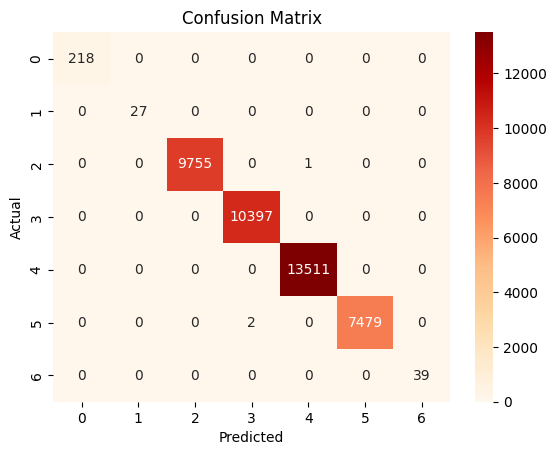

In [ ]:
# Visualization of confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap='OrRd', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Evaluation Metrics for Each Class**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy for each class
accuracy_per_class = []
for i in range(11):
    accuracy_per_class.append(accuracy_score(y_test == i, yet_pred == i))

# Calculate precision for each class
precision_per_class = precision_score(y_test, yet_pred, average=None)

# Calculate recall for each class
recall_per_class = recall_score(y_test, yet_pred, average=None)

# Calculate F1 score for each class
f1_score_per_class = f1_score(y_test, yet_pred, average=None)

# Print results
print("Class\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for i in range(6):
    print(f"{i}\t{accuracy_per_class[i]:.4f}\t\t{precision_per_class[i]:.4f}\t\t{recall_per_class[i]:.4f}\t\t{f1_score_per_class[i]:.4f}")

# Calculate other metrics

# Calculate Cohen's Kappa score
cohen_kappa = cohen_kappa_score(y_test, yet_pred)
print(f"Cohen's Kappa Score: {cohen_kappa:.4f}")

# Calculate ROC AUC score (For binary classification, needs modification for multi-class)
# Assuming you are interested in one class against the rest (binary)
y_prob=et.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test == 0,y_prob,multi_class='ovr' )
print(f"ROC AUC Score: {roc_auc:.4f}")


# Print training and testing time
print(f"Training Time: {training_time:.4f} seconds")
end_pred_time = time.time()  # Testing time ending
testing_time = end_pred_time - start_pred_time
print(f"Testing Time: {testing_time:.4f} seconds")




Class	Accuracy	Precision	Recall		F1 Score
0	1.0000		1.0000		1.0000		1.0000
1	1.0000		1.0000		1.0000		1.0000
2	1.0000		1.0000		0.9999		0.9999
3	1.0000		0.9998		1.0000		0.9999
4	1.0000		0.9999		1.0000		1.0000
5	1.0000		1.0000		0.9997		0.9999
Cohen's Kappa Score: 0.9999
ROC AUC Score: 0.4997
Training Time: 4.6824 seconds
Testing Time: 359.3935 seconds


# **Confidence Curve Visualization**

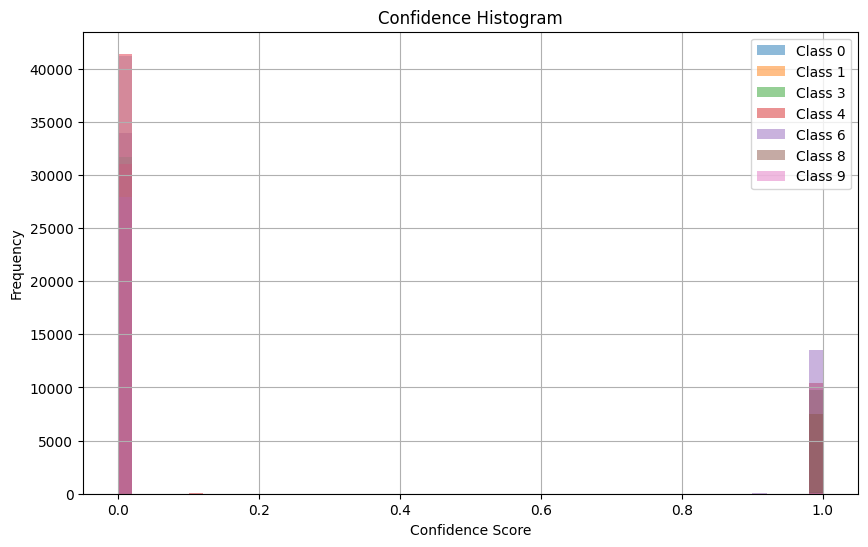

In [ ]:
import matplotlib.pyplot as plt

# Train the ExtraTreesClassifier model as before
et.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_pred_proba = et.predict_proba(X_test)

# Plot the Confidence Histogram
plt.figure(figsize=(10, 6))
for class_idx in range(len(et.classes_)):
    plt.hist(y_pred_proba[:, class_idx], bins=50, alpha=0.5, label=f'Class {et.classes_[class_idx]}')

plt.title('Confidence Histogram')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


# **Learning Curves**

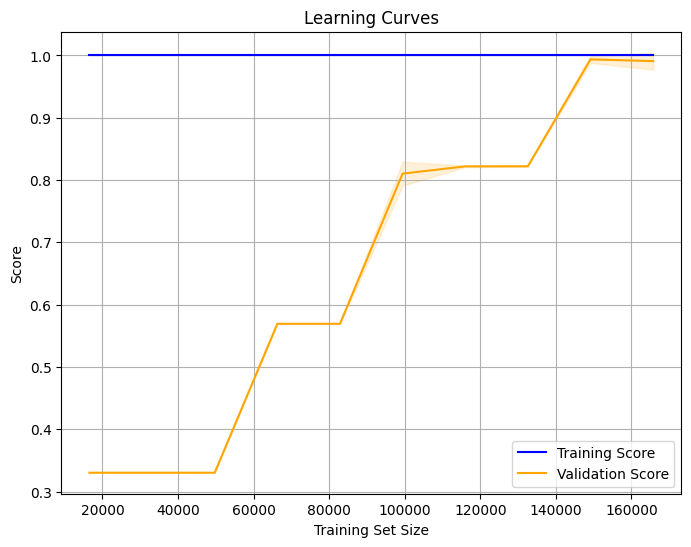

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define the ExtraTreesClassifier and relevant_features as before

# Vary the training set size
train_sizes, train_scores, val_scores = learning_curve(
    et, X[relevant_features], y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='orange')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


# **ROC Curve of TPR vs FPR**

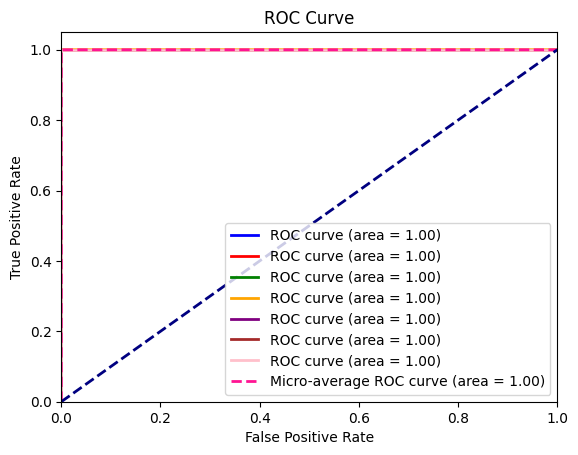

In [ ]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_binarized = label_binarize(y_test, classes=np.unique(y))

# Compute the ROC curve and ROC area for each class
y_pred_proba = et.predict_proba(X_test)
n_classes = y_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--', label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])

# Add labels and legends
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# **Accuracy vs Number of Trees in Extra Tree Classifier**

1.0
0.9997586231866566
1.0
0.999927586955997
1.0
0.999927586955997
1.0
0.9999517246373313
1.0
0.9999758623186656
1.0
0.9999758623186656
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999758623186656
1.0
0.9999758623186656


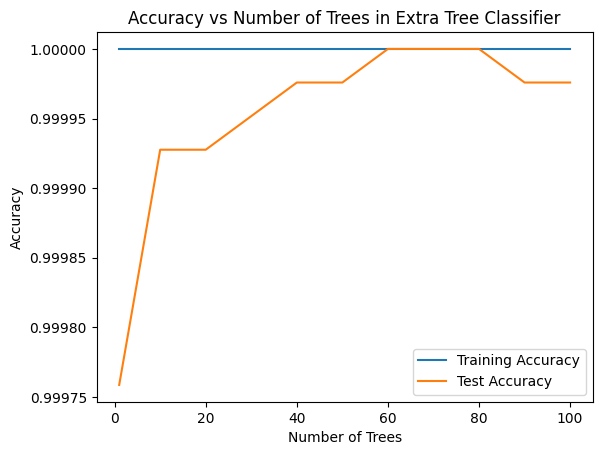

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

# Create a list of the number of trees to test
n_trees = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create empty lists to store accuracy values for each number of trees
train_accuracy = []
test_accuracy = []

# Loop through each number of trees
for n in n_trees:
    # Create a random forest classifier with n trees
    et = ExtraTreesClassifier(n_estimators=n, random_state=42)
    # Fit the model on the training data
    et.fit(X_train, y_train)
    # Calculate accuracy on training data
    train_acc = et.score(X_train, y_train)
    print (train_acc)
    # Append the training accuracy to the list
    train_accuracy.append(train_acc)
    # Calculate accuracy on test data
    y_pred = et.predict(X_test)

    # Calculate accuracy on test set
    test_acc = accuracy_score(y_test, y_pred)
    print(test_acc)

    # Append the test accuracy to the list
    test_accuracy.append(test_acc)

# Create a line plot of the accuracy vs number of trees
plt.plot(n_trees, train_accuracy, label='Training Accuracy')
plt.plot(n_trees, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees in Extra Tree Classifier')
plt.legend()
plt.show()


# **Log Loss Plot with Respect to Predicted Probabilities**

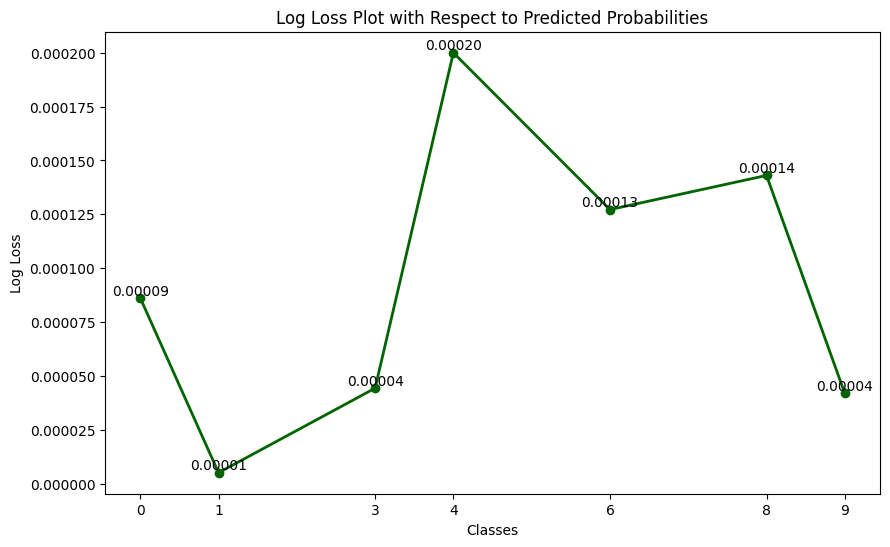

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np

# Get unique labels from true labels
unique_labels = np.unique(y)

# Calculate log loss for each class
log_losses = []
for class_label in unique_labels:
    class_index = np.where(et.classes_ == class_label)[0][0]
    y_true_class = np.where(y_test == class_label, 1, 0)
    y_pred_class = y_pred_proba[:, class_index]
    class_log_loss = log_loss(y_true_class, y_pred_class)
    log_losses.append(class_log_loss)

# Set plot parameters
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(unique_labels, log_losses, marker='o', color='darkgreen', linewidth=2)  # Change color and linewidth
plt.xlabel('Classes')
plt.ylabel('Log Loss')
plt.title('Log Loss Plot with Respect to Predicted Probabilities')
plt.xticks(unique_labels)

# Annotate the log loss values
for i, log_loss_val in enumerate(log_losses):
    plt.text(unique_labels[i], log_loss_val, f'{log_loss_val:.5f}', ha='center', va='bottom')

plt.show()


# **Visualization of Real and Predicted data**

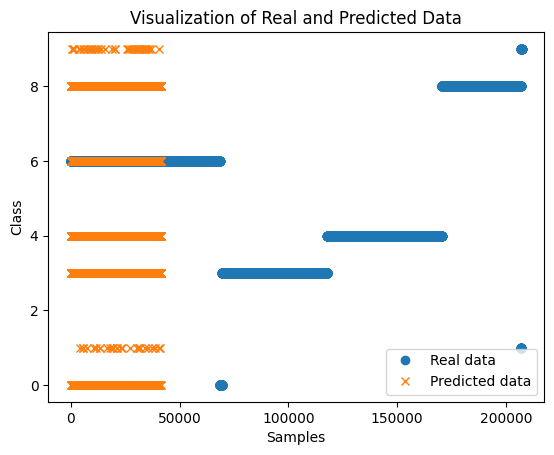

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test, 'o', label='Real data')
plt.plot(y_pred, 'x', label='Predicted data')
plt.title('Visualization of Real and Predicted Data')
plt.xlabel('Samples')
plt.ylabel('Class')
plt.legend()
plt.show()



# **Precision Recall Curves**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


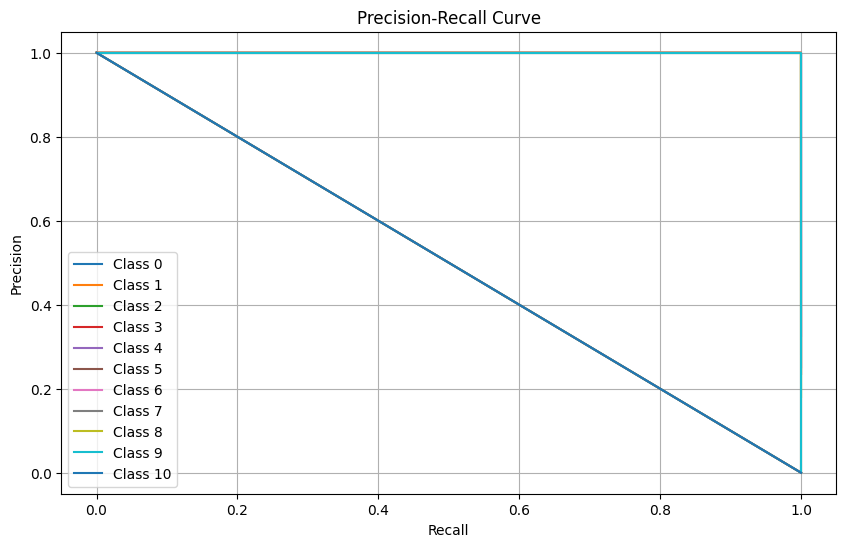

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Convert y_test and yet_pred into binary label matrices
y_test_bin = label_binarize(y_test, classes=range(11))
yet_pred_bin = label_binarize(yet_pred, classes=range(11))

# Compute precision and recall for each class
precision = dict()
recall = dict()
for i in range(11):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], yet_pred_bin[:, i])

# Plot the precision-recall curve for each class
plt.figure(figsize=(10, 6))
for i in range(11):
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# **Roc Curves**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


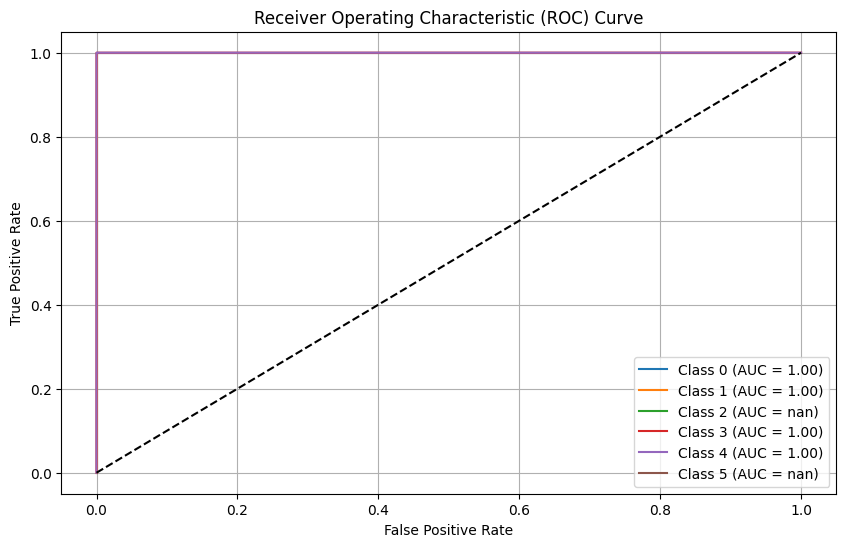

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have the true labels (y_test) and predicted probabilities (yet_pred_probs) for your multi-class problem

# Convert y_test and yet_pred into binary label matrices
y_test_bin = label_binarize(y_test, classes=range(6))
yet_pred_bin = label_binarize(yet_pred, classes=range(6))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], yet_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# **Visualization of Predicted Data**

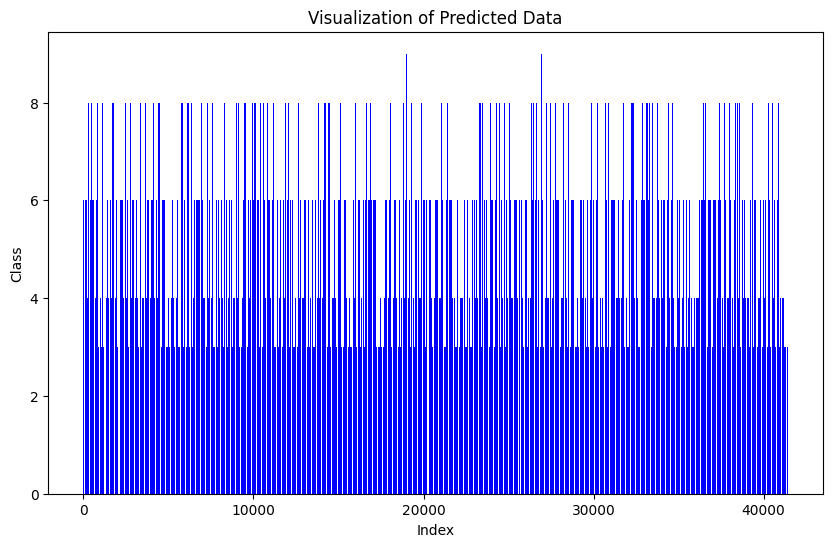

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of indices
indices = np.arange(len(yet_pred))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the predicted values
plt.bar(indices, yet_pred, color='blue')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Class')
plt.title('Visualization of Predicted Data')

# Show the plot
plt.show()


# **Visualization of Comparison of Actual and Predicted Data**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


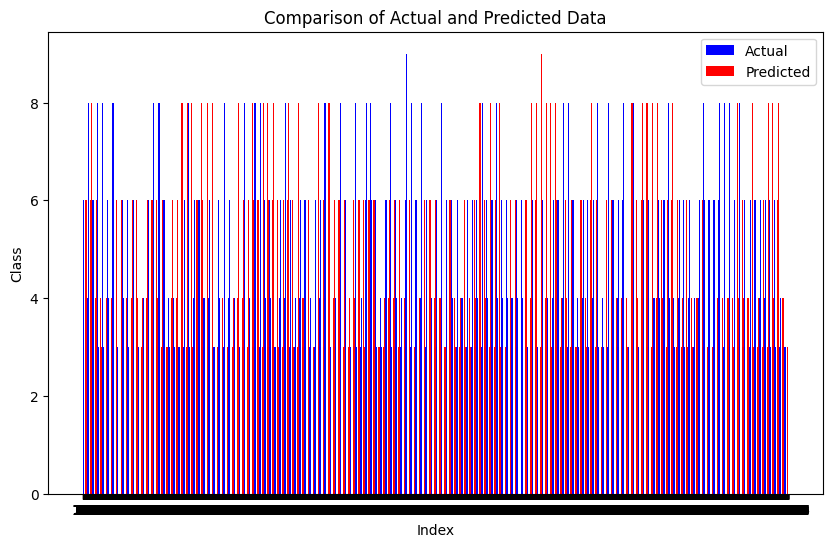

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of indices
indices = np.arange(len(y_test))

# Set the width of the bars
bar_width = 0.35

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the actual values
plt.bar(indices - bar_width/2, y_test, color='blue', width=bar_width, label='Actual')

# Plot the predicted values
plt.bar(indices + bar_width/2, yet_pred, color='red', width=bar_width, label='Predicted')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Data')
plt.xticks(indices)
plt.legend()

# Show the plot
plt.show()
